In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import pandas as pd
df = pd.read_csv("/content/creditcard_2023.csv")

In [ ]:
#the data is unbalanced and this make it balanced
from imblearn.over_sampling import SMOTE

# Load your dataset
df = pd.read_csv('/content/creditcard_2023.csv')

# Drop rows with NaN values in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled data back into a DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled

class_distribution = resampled_df['Class'].value_counts()
print("New Class Distribution:")
print(class_distribution)
resampled_df.to_csv('/content/balanced_dataset.csv', index=False)

New Class Distribution:
Class
0.0    284315
1.0    284315
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400090 entries, 0 to 400089
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      400090 non-null  int64  
 1   V1      400090 non-null  float64
 2   V2      400090 non-null  float64
 3   V3      400090 non-null  float64
 4   V4      400090 non-null  float64
 5   V5      400090 non-null  float64
 6   V6      400090 non-null  float64
 7   V7      400090 non-null  float64
 8   V8      400090 non-null  float64
 9   V9      400090 non-null  float64
 10  V10     400090 non-null  float64
 11  V11     400090 non-null  float64
 12  V12     400090 non-null  float64
 13  V13     400090 non-null  float64
 14  V14     400090 non-null  float64
 15  V15     400090 non-null  float64
 16  V16     400090 non-null  float64
 17  V17     400090 non-null  float64
 18  V18     400090 non-null  float64
 19  V19     400090 non-null  float64
 20  V20     400090 non-null  float64
 21  V21     400090 

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,...,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000,400090.000000
mean,200044.500000,0.212864,-0.206527,0.286742,-0.309284,0.141836,0.181905,0.206678,-0.058364,0.245881,...,-0.047384,-0.005635,-0.005670,0.055653,-0.025251,-0.029940,-0.089368,-0.044276,12037.647596,0.289372
std,115496.178937,0.963471,0.918798,0.949823,0.949707,0.889590,0.920764,0.912603,0.779277,0.944461,...,0.779043,0.872029,0.861563,1.058309,0.938227,1.036314,0.836628,0.920135,6922.833943,0.453472
min,0.000000,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-39.035243,50.120000,0.000000
25%,100022.250000,-0.340193,-0.574304,-0.215863,-0.915381,-0.126994,-0.200053,0.063863,-0.195670,-0.208708,...,-0.183073,-0.504814,-0.213799,-0.630658,-0.570065,-0.700237,-0.312232,-0.230033,6053.892500,0.000000
50%,200044.500000,0.023167,-0.292650,0.281765,-0.399568,0.159940,0.193257,0.357908,-0.131868,0.290757,...,-0.079994,-0.032009,-0.047984,0.064990,-0.027342,-0.050961,-0.208428,-0.047471,12021.775000,0.000000
75%,300066.750000,0.975089,0.021902,0.866273,0.258713,0.478125,0.591691,0.585062,-0.016478,0.724174,...,0.044833,0.462579,0.141459,0.809710,0.528413,0.619248,0.058862,0.234902,18039.540000,1.000000
max,400089.000000,2.229046,4.361865,14.125834,3.201536,42.716891,26.168402,217.873038,5.958040,20.270062,...,8.087080,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,1.000000


In [ ]:
Numerical_Features = df.select_dtypes(include=['int64', 'float64']).columns
Categorical_Features = df.select_dtypes(include=['object']).columns

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled

# Check new class distribution
class_distribution = resampled_df['Class'].value_counts()
print("New Class Distribution:")
print(class_distribution)


New Class Distribution:
Class
0.0    115775
1.0    115775
Name: count, dtype: int64


In [ ]:
df_balanced = resampled_df.copy()
df_balanced.drop_duplicates(inplace=True)


df_balanced.duplicated().sum()


np.int64(0)

In [ ]:
print("Missing values", df_balanced.isnull().sum())




Missing values:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


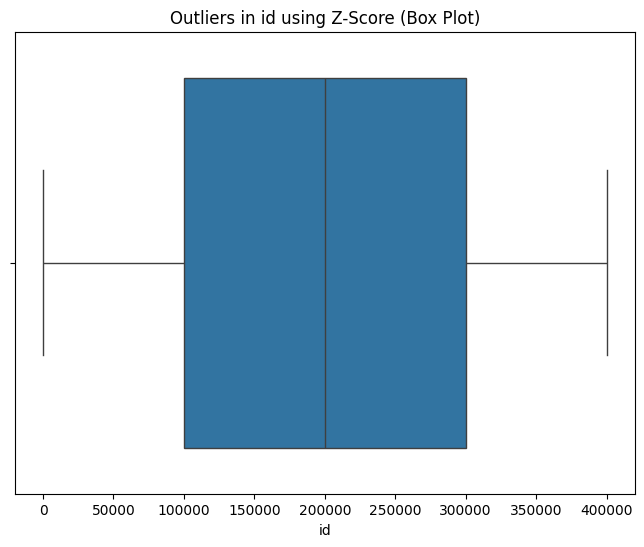

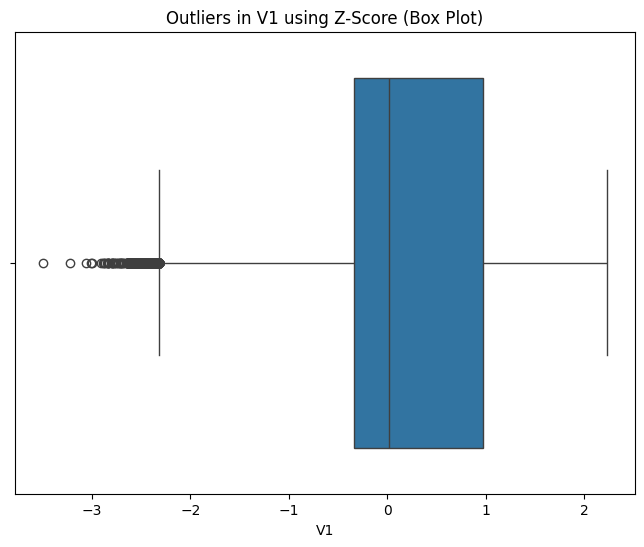

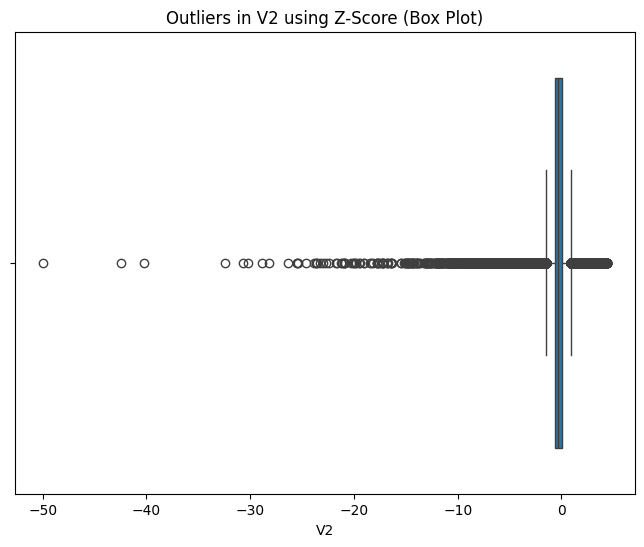

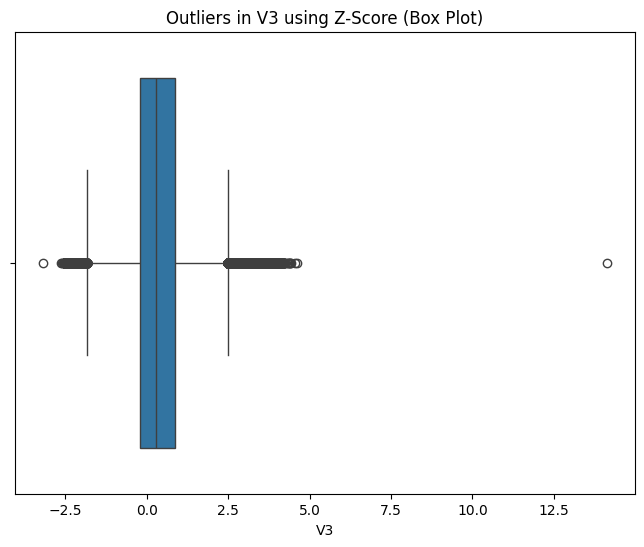

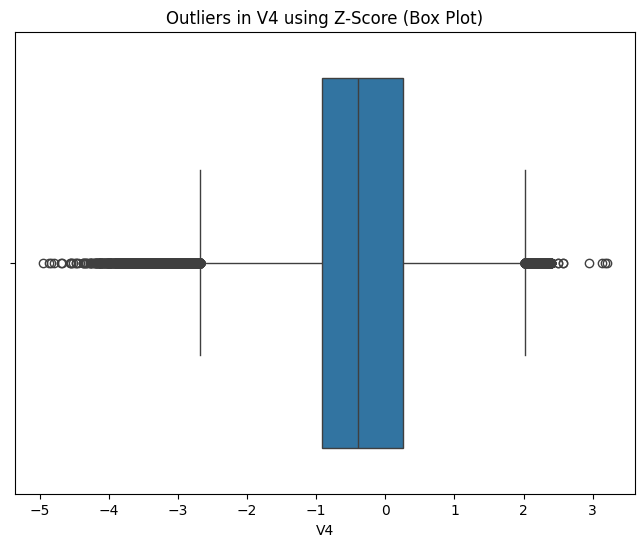

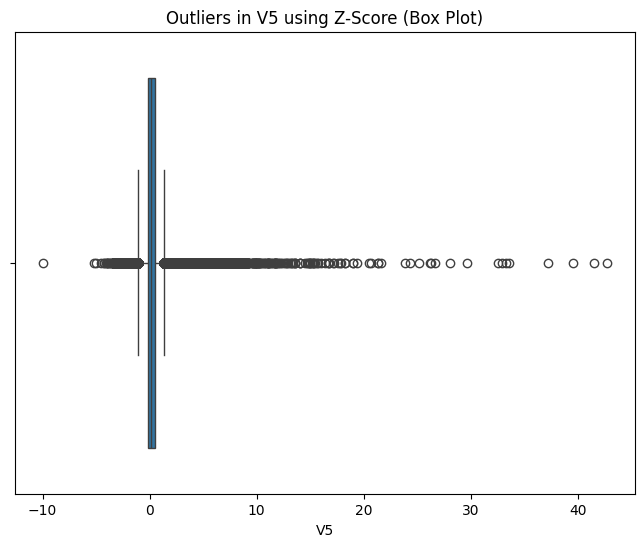

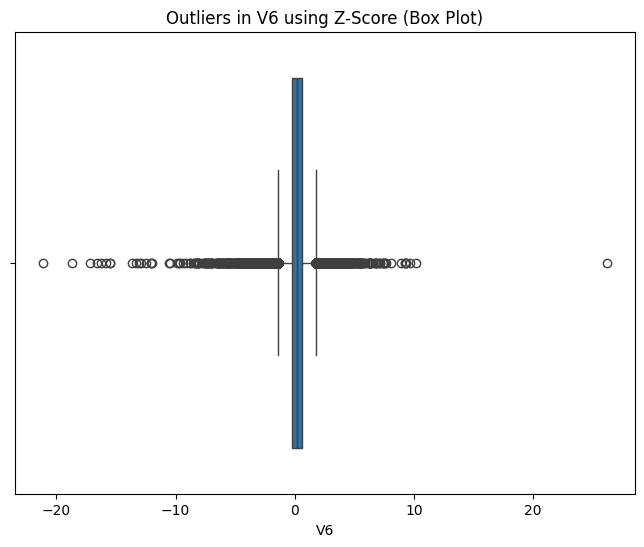

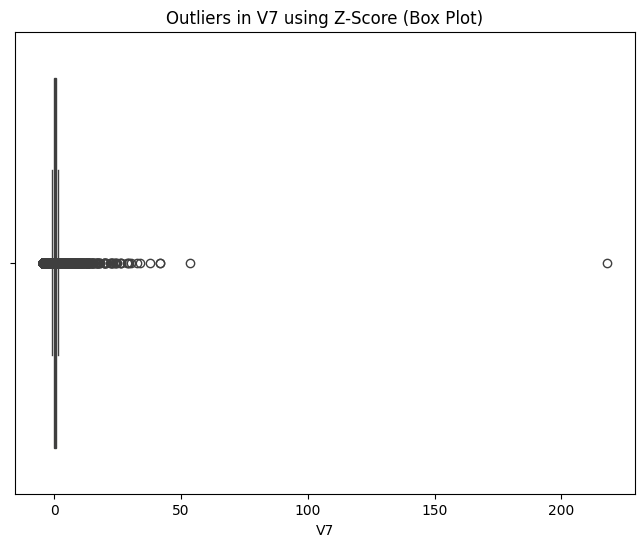

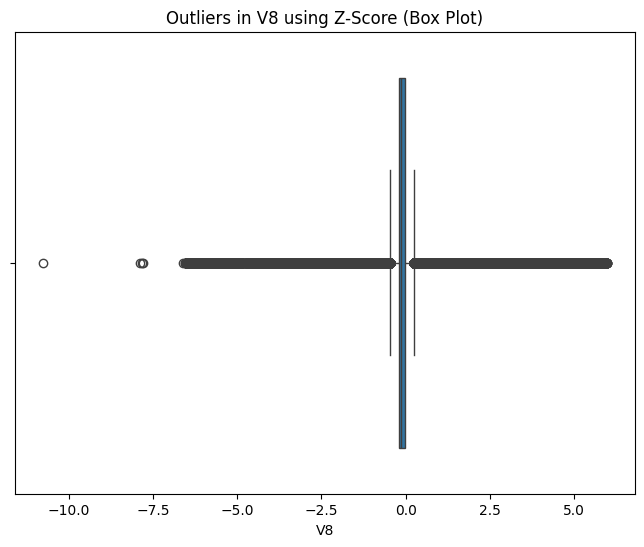

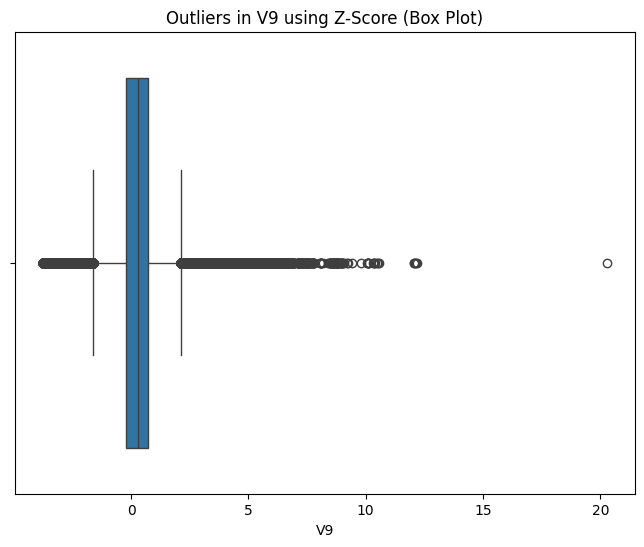

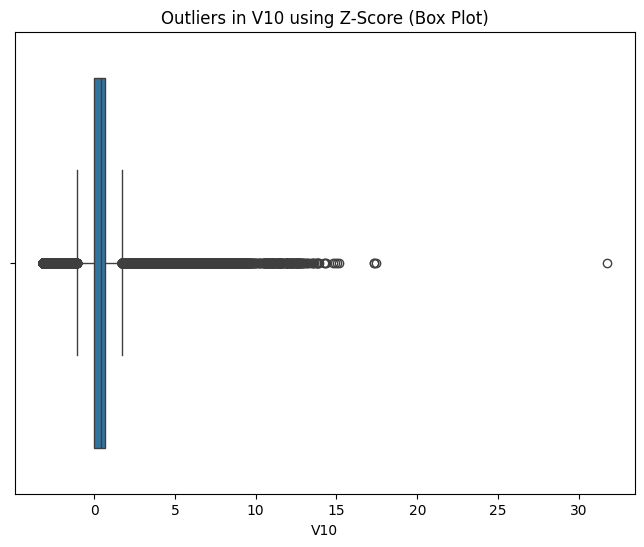

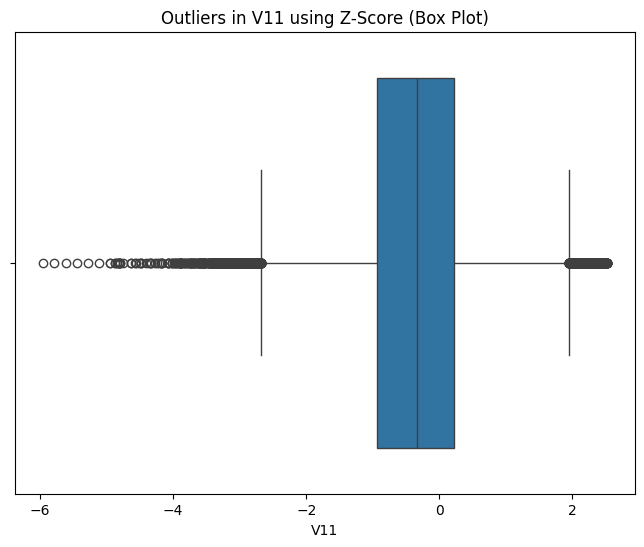

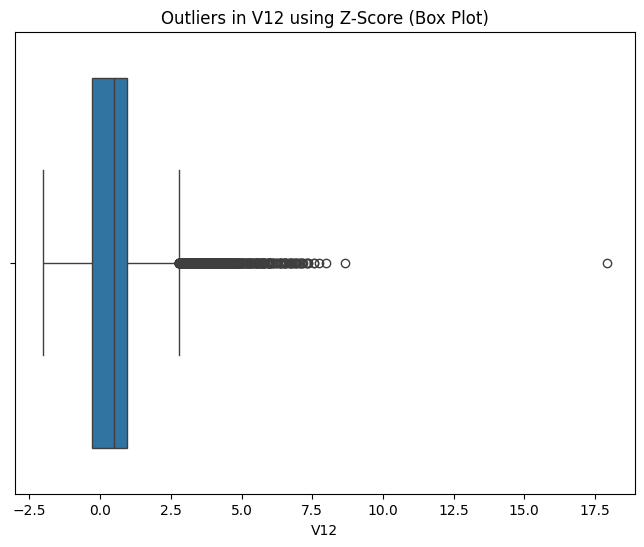

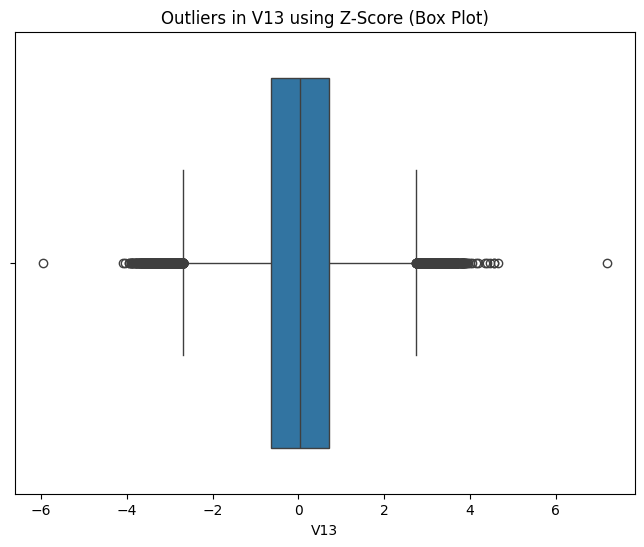

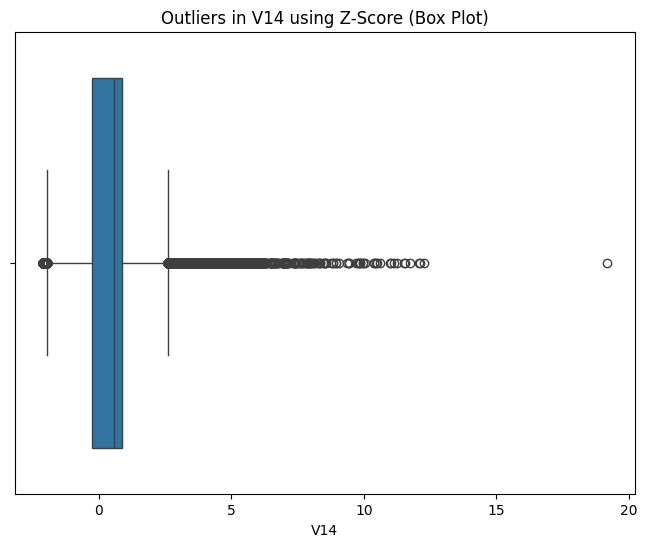

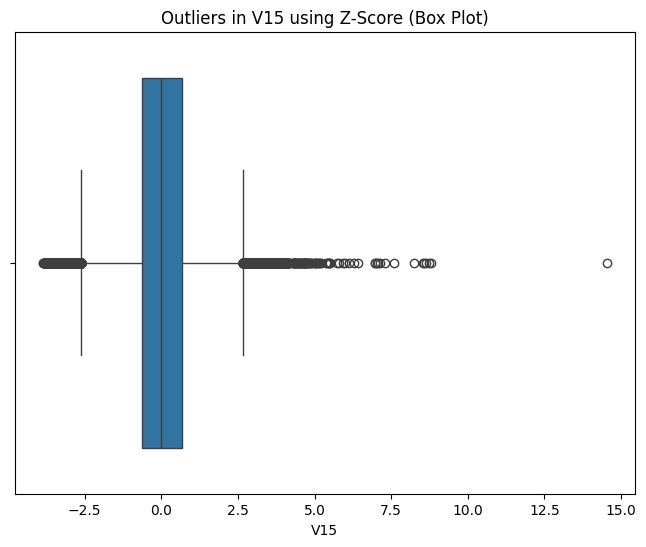

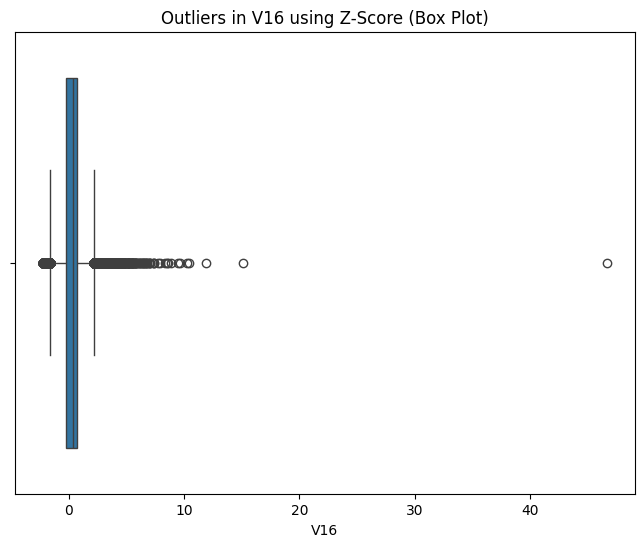

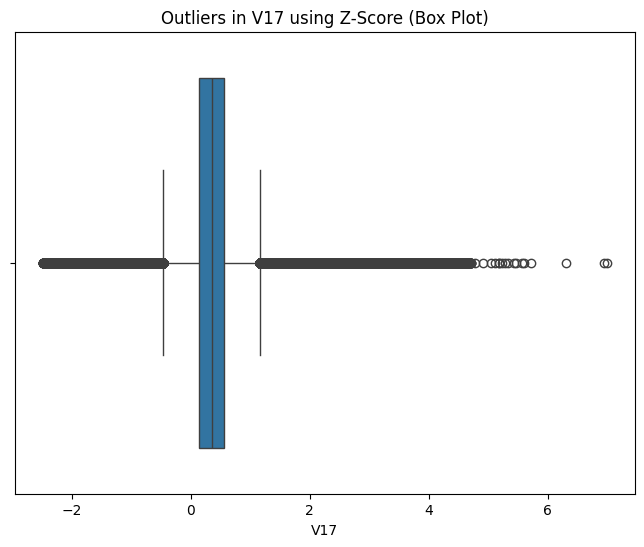

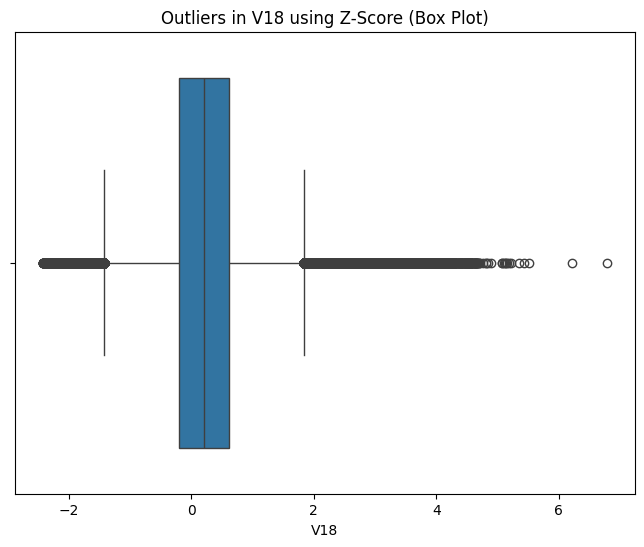

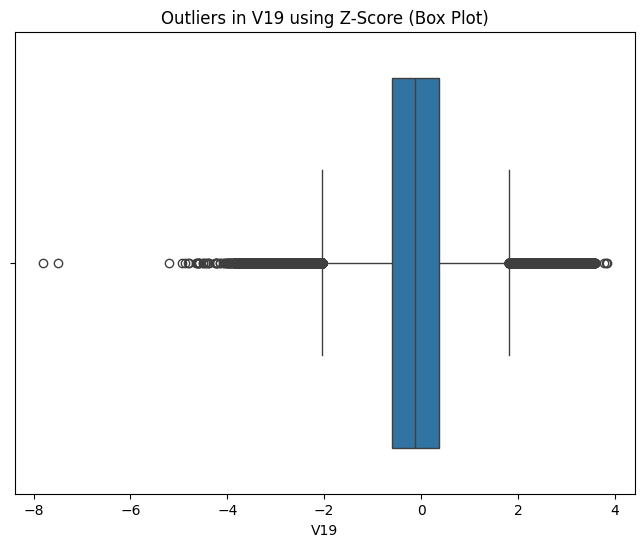

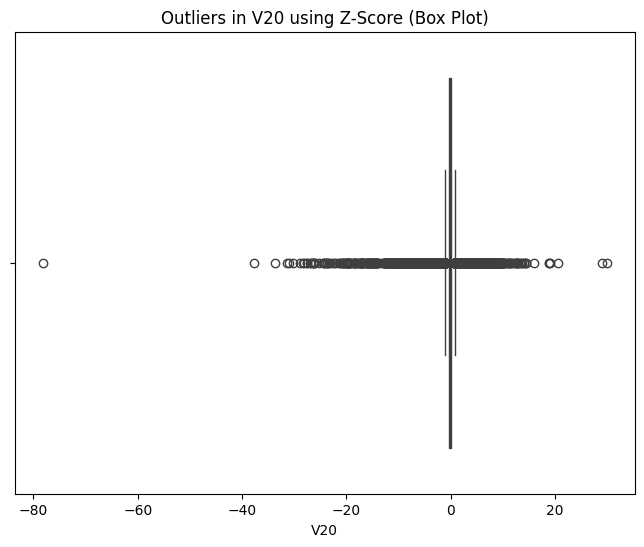

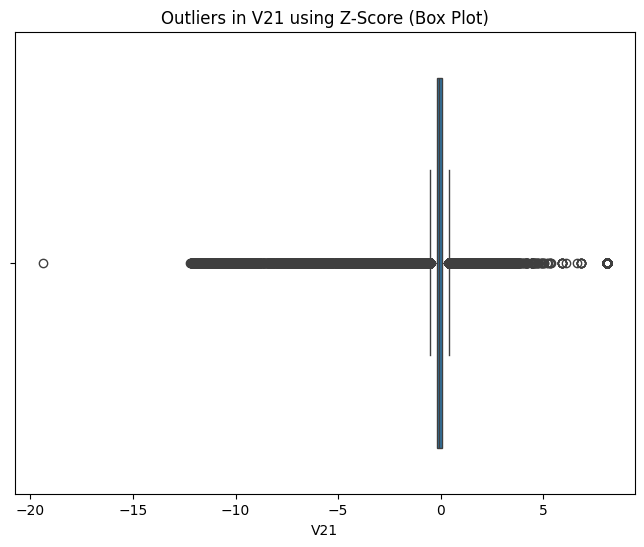

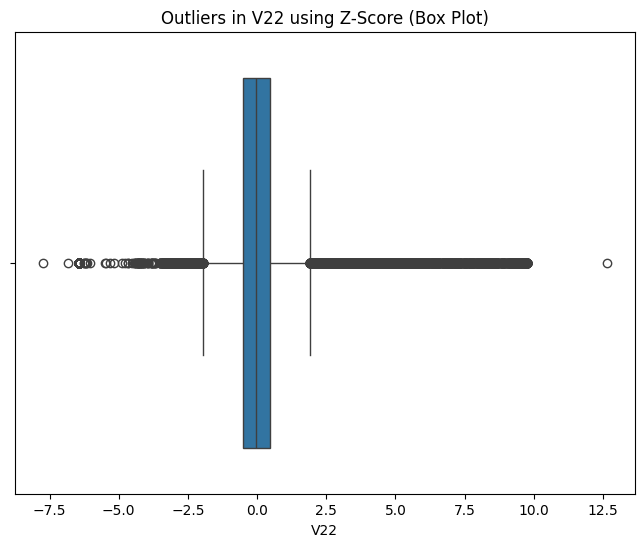

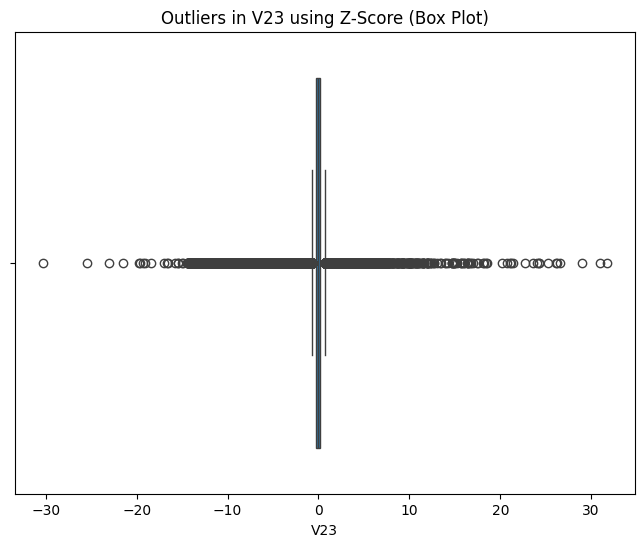

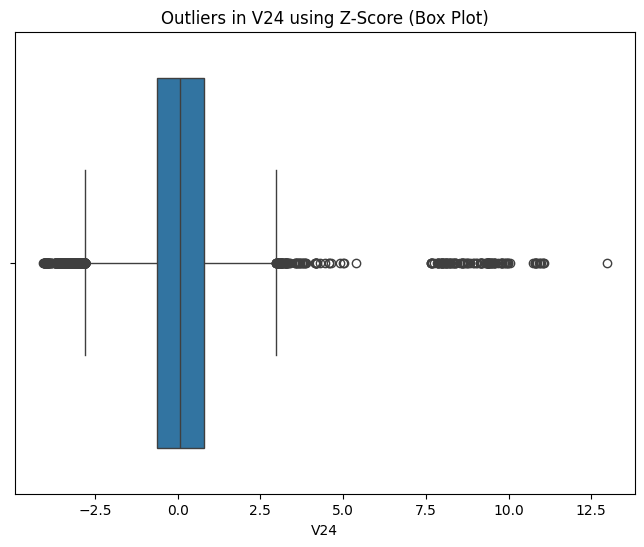

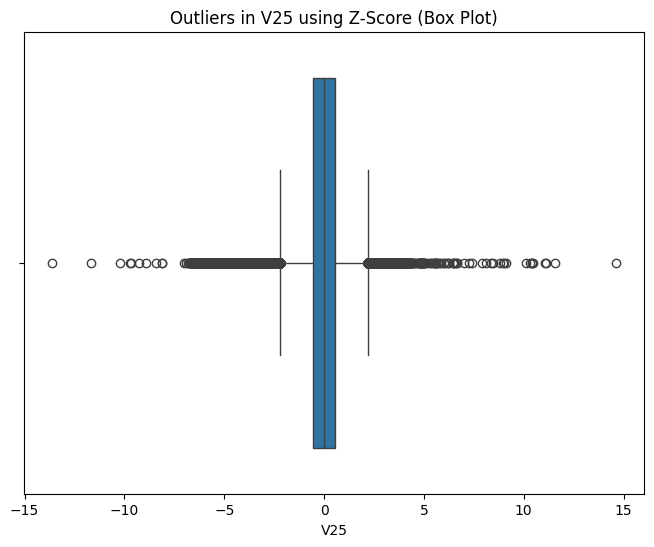

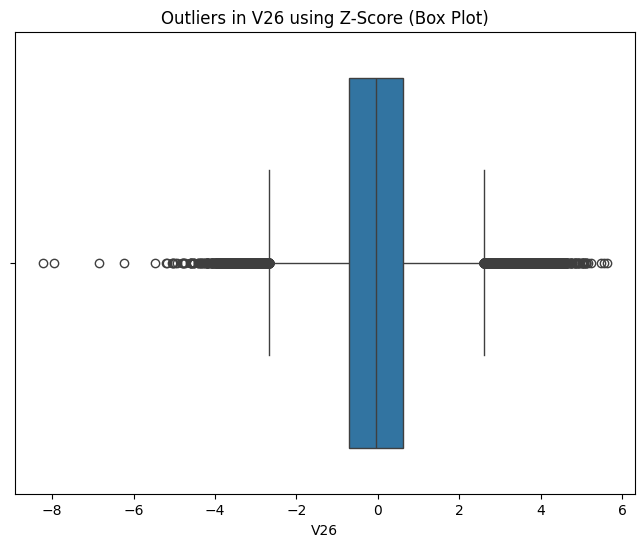

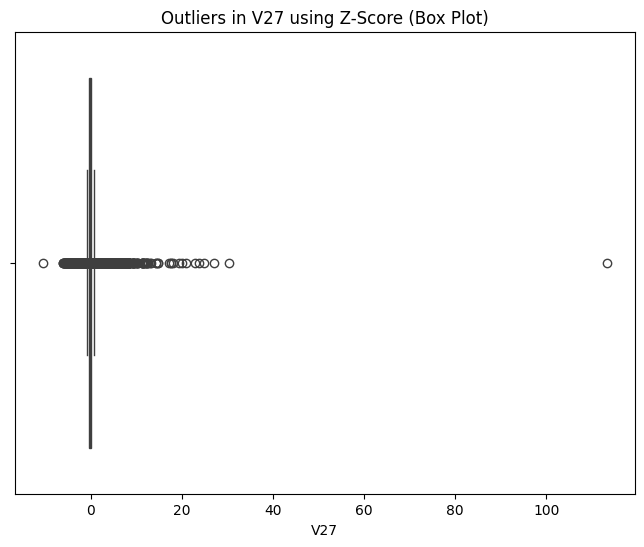

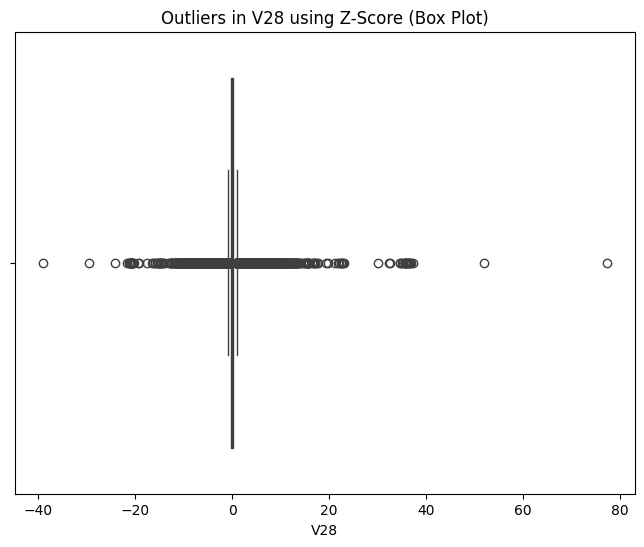

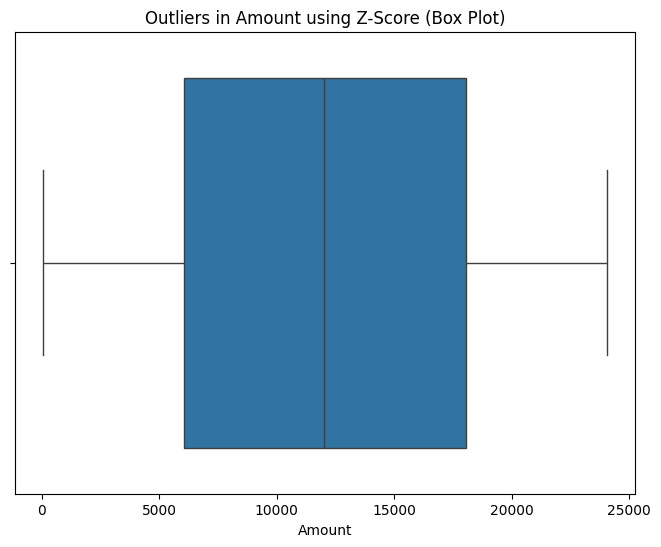

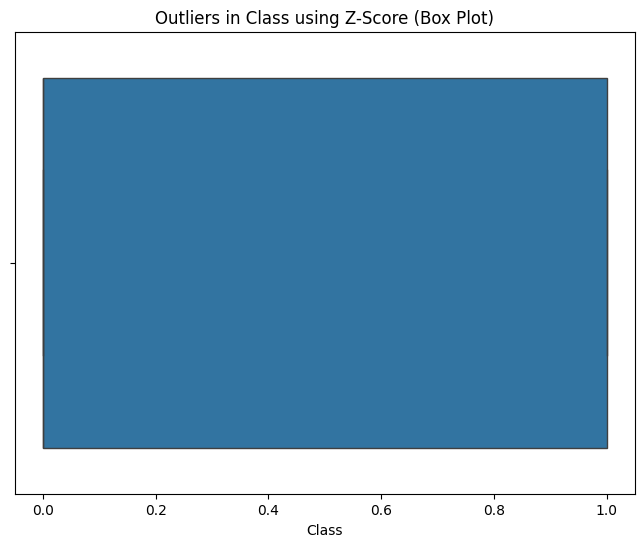

<ipython-input-30-9339dbb2c59a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_iqr = df_balanced[(((df_balanced[Numerical_Features]) < (Q1 - 1.5 * IQR)) | (df[Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]


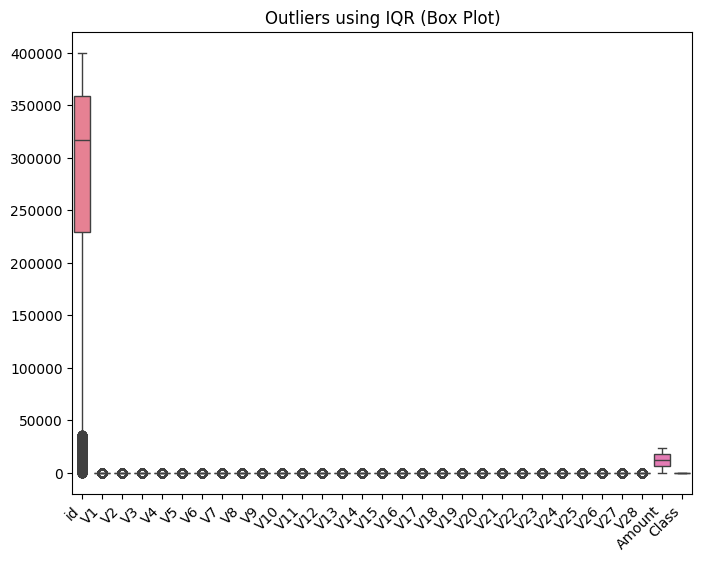

In [ ]:
import numpy as np
for feature in Numerical_Features:
    mean = np.mean(df_balanced[feature])
    std = np.std(df_balanced[feature])
    z_scores = (df_balanced[feature] - mean) / std
    outliers_z = df_balanced[feature][np.abs(z_scores) > 3]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature} using Z-Score (Box Plot)')
    plt.show()

# IQR method
Q1 = df_balanced[Numerical_Features].quantile(0.25)
Q3 = df_balanced[Numerical_Features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df_balanced[(((df_balanced[Numerical_Features]) < (Q1 - 1.5 * IQR)) | (df[Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(8, 6))
sns.boxplot(data=outliers_iqr[Numerical_Features])
plt.title('Outliers using IQR (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
X = df_balanced.drop(columns=['Class'])
y = df_balanced['Class']

X_manual = X.drop(columns=['Amount'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_manual)

X_combined = np.hstack((X_scaled, X[['Amount']].values))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
logistic_model = LogisticRegression(max_iter=1500)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.9974735478298423


In [ ]:
def evaluate_classification_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

print("Logistic Regression:")
evaluate_classification_model(y_test, y_pred_logistic, "Logistic Regression")

Logistic Regression:
Logistic Regression - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

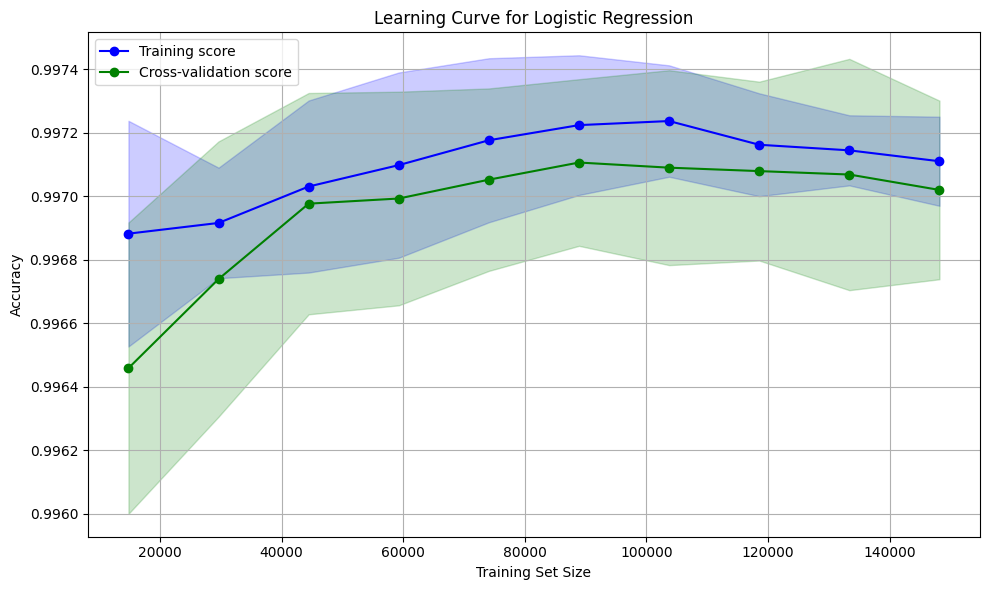

In [ ]:
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    log_reg,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Calculate mean and std
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_scores_mean, label="Cross-validation score", color="green", marker='o')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()